In [3]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip (lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

       # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [8]:
import requests
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ', '+')

    # Log the URL, record, and set numbers and the city.
    print (f'Processing Record {record_count} of Set {set_count} | {city}')

    # Add 1 to the recount count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({'City': city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
#If an error is experience, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-------------------------")
print("Data Retrieval Complete  ")
print("-------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | san luis
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | ironton
Processing Record 7 of Set 1 | lichuan
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | kota
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | port hardy
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | marfino
Processing Record 17 of Set 1 | san cristobal
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | auki
Processing Record 22 of Set 1 | ballater
Processing Record 23 of Set 1 | arr

Processing Record 40 of Set 4 | turukhansk
Processing Record 41 of Set 4 | kota belud
Processing Record 42 of Set 4 | rancho palos verdes
Processing Record 43 of Set 4 | sioux lookout
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | kati
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | rio gallegos
Processing Record 48 of Set 4 | mudanya
Processing Record 49 of Set 4 | keetmanshoop
Processing Record 50 of Set 4 | abnub
Processing Record 1 of Set 5 | mayo
Processing Record 2 of Set 5 | puerto ayora
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 | illapel
Processing Record 5 of Set 5 | cochrane
Processing Record 6 of Set 5 | dongsheng
Processing Record 7 of Set 5 | jalingo
Processing Record 8 of Set 5 | buariki
City not found. Skipping...
Processing Record 9 of Set 5 | uwayl
City not found. Skipping...
Processing Record 10 of Set 5 | iskateley
Processing Record 11 of Set 5 | kavaratti
Processing Record 12 of Set 5 | d

Processing Record 30 of Set 8 | yagodnoye
Processing Record 31 of Set 8 | podgorica
Processing Record 32 of Set 8 | vincennes
Processing Record 33 of Set 8 | namatanai
Processing Record 34 of Set 8 | qaqortoq
Processing Record 35 of Set 8 | halifax
Processing Record 36 of Set 8 | verkhnevilyuysk
Processing Record 37 of Set 8 | shimanovsk
Processing Record 38 of Set 8 | ilhabela
Processing Record 39 of Set 8 | ribeira grande
Processing Record 40 of Set 8 | kyren
Processing Record 41 of Set 8 | valenca do piaui
Processing Record 42 of Set 8 | ostrovnoy
Processing Record 43 of Set 8 | camana
Processing Record 44 of Set 8 | chalus
Processing Record 45 of Set 8 | brae
Processing Record 46 of Set 8 | tame
Processing Record 47 of Set 8 | gorontalo
Processing Record 48 of Set 8 | karratha
Processing Record 49 of Set 8 | meulaboh
Processing Record 50 of Set 8 | fort-shevchenko
Processing Record 1 of Set 9 | tadepallegudem
Processing Record 2 of Set 9 | benevides
Processing Record 3 of Set 9 | k

Processing Record 20 of Set 12 | soyo
Processing Record 21 of Set 12 | pathein
Processing Record 22 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 23 of Set 12 | hoi an
Processing Record 24 of Set 12 | artyk
City not found. Skipping...
Processing Record 25 of Set 12 | suileng
Processing Record 26 of Set 12 | mount isa
Processing Record 27 of Set 12 | bani walid
Processing Record 28 of Set 12 | vestmannaeyjar
Processing Record 29 of Set 12 | ilanskiy
Processing Record 30 of Set 12 | hokitika
Processing Record 31 of Set 12 | port augusta
Processing Record 32 of Set 12 | saint-francois
Processing Record 33 of Set 12 | tunja
Processing Record 34 of Set 12 | yingkou
Processing Record 35 of Set 12 | teguise
Processing Record 36 of Set 12 | bulungu
Processing Record 37 of Set 12 | grindavik
Processing Record 38 of Set 12 | bowen
Processing Record 39 of Set 12 | pangody
Processing Record 40 of Set 12 | broken hill
Processing Record 41 of Set 12 | puerto escondido
Processi

In [12]:
len(city_data)

579

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.4612,-71.1419,82.04,76,10,14.16,TC,2021-10-08 10:08:26
1,Esperance,-33.8667,121.9000,57.40,66,56,15.28,AU,2021-10-08 10:08:27
2,Vaini,-21.2000,-175.2000,75.36,94,75,2.30,TO,2021-10-08 10:08:27
3,San Luis,-33.2950,-66.3356,60.49,50,100,5.41,AR,2021-10-08 10:08:27
4,Tasiilaq,65.6145,-37.6368,33.96,50,1,7.00,GL,2021-10-08 10:08:28
5,Ironton,38.5368,-82.6829,65.43,98,90,0.00,US,2021-10-08 10:08:28
6,Lichuan,30.3000,108.8500,60.85,80,46,4.38,CN,2021-10-08 10:08:29
7,Punta Arenas,-53.1500,-70.9167,46.51,66,0,26.46,CL,2021-10-08 10:05:32
8,Bluff,-46.6000,168.3333,50.81,94,81,14.81,NZ,2021-10-08 10:08:29
9,Port Elizabeth,-33.9180,25.5701,74.10,60,0,20.71,ZA,2021-10-08 10:08:30


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cockburn Town,TC,2021-10-08 10:08:26,21.4612,-71.1419,82.04,76,10,14.16
1,Esperance,AU,2021-10-08 10:08:27,-33.8667,121.9000,57.40,66,56,15.28
2,Vaini,TO,2021-10-08 10:08:27,-21.2000,-175.2000,75.36,94,75,2.30
3,San Luis,AR,2021-10-08 10:08:27,-33.2950,-66.3356,60.49,50,100,5.41
4,Tasiilaq,GL,2021-10-08 10:08:28,65.6145,-37.6368,33.96,50,1,7.00
5,Ironton,US,2021-10-08 10:08:28,38.5368,-82.6829,65.43,98,90,0.00
6,Lichuan,CN,2021-10-08 10:08:29,30.3000,108.8500,60.85,80,46,4.38
7,Punta Arenas,CL,2021-10-08 10:05:32,-53.1500,-70.9167,46.51,66,0,26.46
8,Bluff,NZ,2021-10-08 10:08:29,-46.6000,168.3333,50.81,94,81,14.81
9,Port Elizabeth,ZA,2021-10-08 10:08:30,-33.9180,25.5701,74.10,60,0,20.71


In [17]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City ID')

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

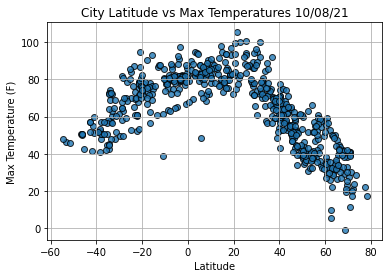

In [19]:
# Import time module
import time

# Build scatter plot for latitude vs. max temp.
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker = "o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperatures " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

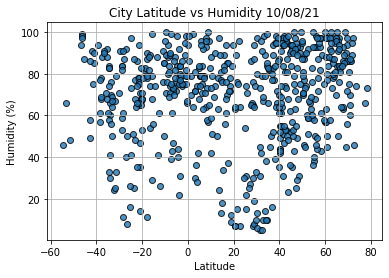

In [20]:
# Import time module
import time

# Build scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker = "o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

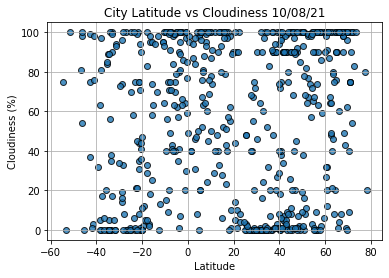

In [21]:
# Import time module
import time

# Build scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker = "o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

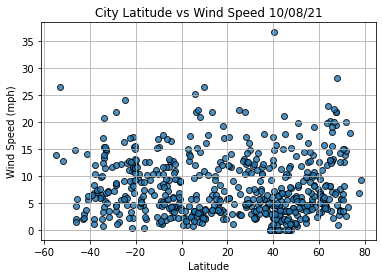

In [22]:
# Import time module
import time

# Build scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker = "o",
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [25]:
#Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-10-08 10:08:32
Lat                      -46.1927
Lng                      168.8643
Max Temp                    50.49
Humidity                       99
Cloudiness                     98
Wind Speed                   1.99
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
574     True
575     True
576    False
577    False
578    False
Name: Lat, Length: 579, dtype: bool

In [29]:
# Return DataFrame with all latitudes greater than 0.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cockburn Town,TC,2021-10-08 10:08:26,21.4612,-71.1419,82.04,76,10,14.16
4,Tasiilaq,GL,2021-10-08 10:08:28,65.6145,-37.6368,33.96,50,1,7.00
5,Ironton,US,2021-10-08 10:08:28,38.5368,-82.6829,65.43,98,90,0.00
6,Lichuan,CN,2021-10-08 10:08:29,30.3000,108.8500,60.85,80,46,4.38
10,Kota,IN,2021-10-08 10:08:30,25.1833,75.8333,94.37,31,3,2.91


In [30]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

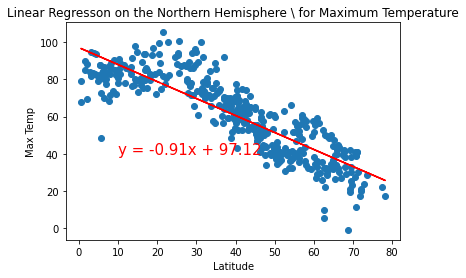

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regresson on the Northern Hemisphere \ for Maximum Temperature',
                      'Max Temp', (10,40))

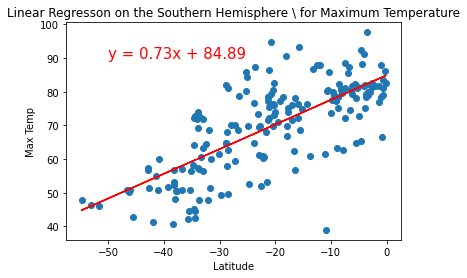

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regresson on the Southern Hemisphere \ for Maximum Temperature',
                      'Max Temp', (-50, 90))

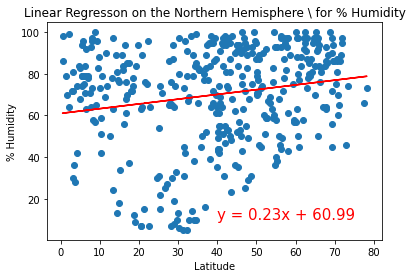

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regresson on the Northern Hemisphere \ for % Humidity',
                      '% Humidity', (40,10))

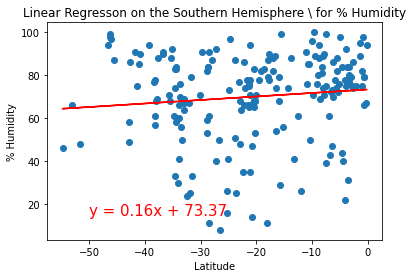

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regresson on the Southern Hemisphere \ for % Humidity',
                      '% Humidity', (-50,15))

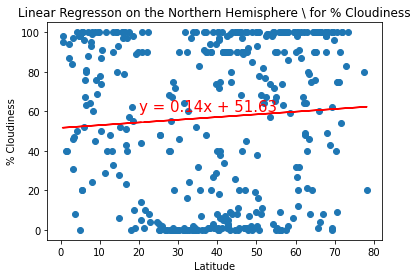

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regresson on the Northern Hemisphere \ for % Cloudiness',
                      '% Cloudiness', (20,60))

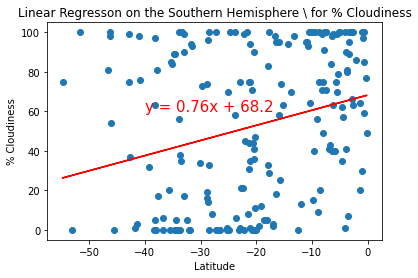

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regresson on the Southern Hemisphere \ for % Cloudiness',
                      '% Cloudiness', (-40,60))

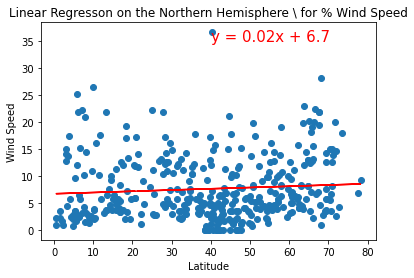

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regresson on the Northern Hemisphere \ for % Wind Speed',
                      'Wind Speed', (40,35))

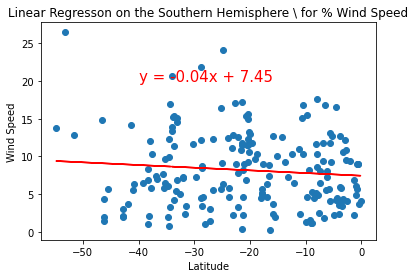

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regresson on the Southern Hemisphere \ for % Wind Speed',
                      'Wind Speed', (-40,20))